
You did a great Job!


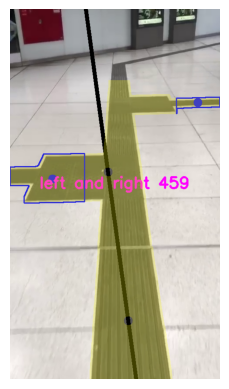

In [10]:
import cv2
import matplotlib.pyplot as plt
from tools import user_input, FrameObject, FindDirection, Segmentation

counter =0

# Open the video file
video, line_color, total_frames = user_input()
# init class/values for while loop
direct = FindDirection()
#loop through all frames of video
while video.isOpened():
    #Read a single frame
    ret, frame = video.read()
    if not ret:
        print("Error load frame")
        break

    counter = counter +1
    
    #Create a Frame Object
    frame = FrameObject(frame)
    #get image from FrameObject
    img = frame.img
    #Create Segmemtation Object  
    seg = Segmentation(frame, line_color)
    #get the orientation line
    img_seg = seg.get_orientation_lines()
    frame.build_center_line(img_seg)
    #used later to find the directions
    img = frame.make_block_over_center_line()
    
    # Get Values from FrameObject to Direction Object
    direct.get_values_from_frame_object(frame)
    direct.wait_for_complete_contour(img)
    direct.find_nearest_line(img_seg)
    direct.check_where_to_go()
    res_text = direct.smooth_output()
    frame.text_in_frame(res_text)
    frame_show = frame.overlay_segmentation(img_seg)
    

    cv2.imshow('Processed Frame',frame_show)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if video.get(cv2.CAP_PROP_POS_FRAMES) == total_frames:
        break

    if counter == 930:
        img_out = cv2.cvtColor(frame_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_out)
        plt.axis('off')
        plt.savefig('ausgabe.jpg', format='jpeg', dpi=300)
        plt.show()
        break

    
# Release the video objects and close the windows
video.release()
cv2.destroyAllWindows()